<a href="https://colab.research.google.com/github/marciofag/py-consumo-energia-eletrica-palacio/blob/main/consumo_energia_eletrica_palacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling com Dados - Análise do Consumo de Energia Elétrica no Palácio do Jaburu

## Objetivo da Análise

Explorar os dados de consumo de energia elétrica do Palácio do Jaburu entre 2017 e setembro de 2024, identificando padrões sazonais, tendências anuais e correlações entre o consumo e o valor da fatura.

In [ ]:
# Etapa 1: Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carregamento e Tratamento dos dados

In [ ]:
# Etapa 2: Carregamento dos Dados
arquivo = "/content/consumo-de-energia-eletrica-no-palacio-do-jaburu-2017-2024-setembro.xlsx"
data = pd.read_excel(arquivo)

# Etapa 3: Limpeza e Ajustes
# Renomear colunas para facilitar o uso
data.columns = ['Ano', 'Mes', 'Consumo_kWh', 'Valor_Fatura']

# Converter mês para categórico com ordenação correta
data['Mes'] = pd.Categorical(data['Mes'],
                              categories=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],
                              ordered=True)

## Visualização de Gráficos

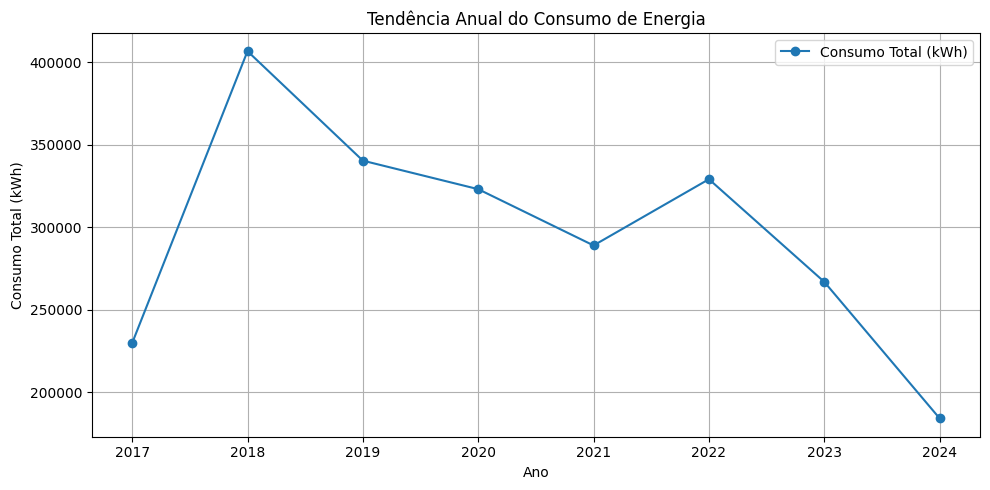

In [ ]:
# Etapa 4: Análise e Visualização
## a) Tendências Anuais
df_anual = data.groupby('Ano').agg({'Consumo_kWh': 'sum', 'Valor_Fatura': 'mean'}).reset_index()
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df_anual['Ano'], df_anual['Consumo_kWh'], marker='o', label='Consumo Total (kWh)')
ax1.set_ylabel('Consumo Total (kWh)')
ax1.set_xlabel('Ano')
ax1.set_title('Tendência Anual do Consumo de Energia')
ax1.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-5-92ae218e497c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mensal = data.groupby('Mes')['Consumo_kWh'].mean().reset_index()


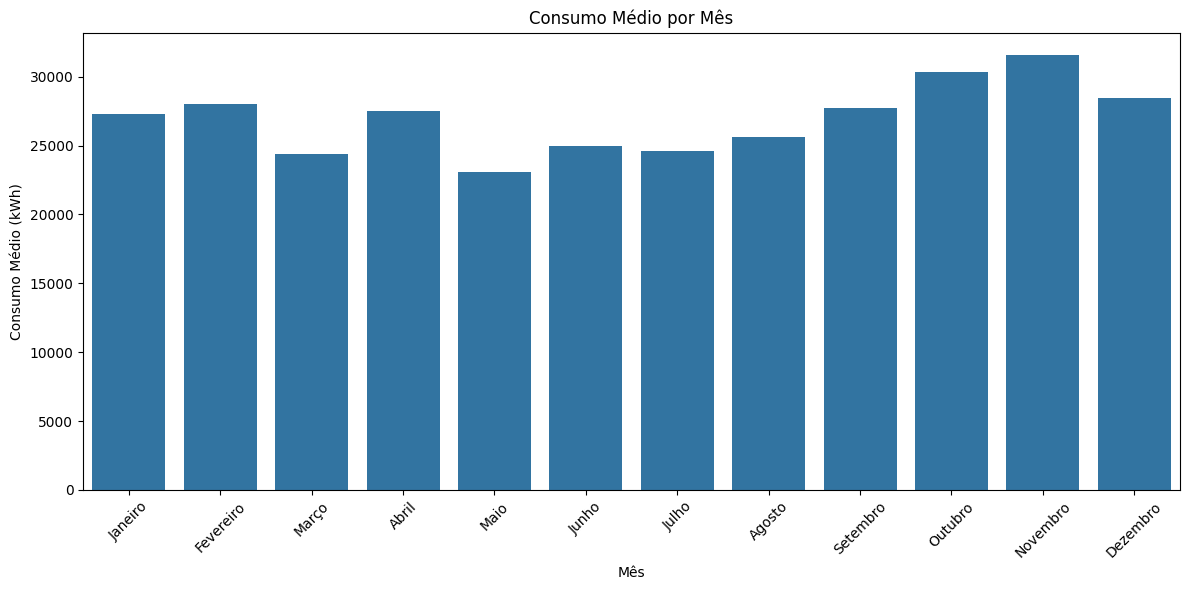

In [ ]:
## b) Consumo Médio por Mês
df_mensal = data.groupby('Mes')['Consumo_kWh'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Mes', y='Consumo_kWh', data=df_mensal)
plt.title('Consumo Médio por Mês')
plt.xticks(rotation=45)
plt.ylabel('Consumo Médio (kWh)')
plt.xlabel('Mês')
plt.tight_layout()
plt.show()

In [ ]:
## c) Correlação entre Consumo e Valor
correlacao = data[['Consumo_kWh', 'Valor_Fatura']].corr().iloc[0,1]
print(f"Correlação entre Consumo e Valor da Fatura: {correlacao:.2f}")

Correlação entre Consumo e Valor da Fatura: 0.62


In [ ]:
## d) Gráfico Interativo
fig_interativo = px.scatter(data, x='Consumo_kWh', y='Valor_Fatura', color='Ano',
                            hover_data=['Mes'],
                            title='Correlação entre Consumo e Valor da Fatura por Ano')
fig_interativo.show()

###📈 **Relatório de Análise de Consumo de Energia Elétrica no Palácio do Jaburu (2017 - 2024)**

**1. Tendências Anuais no Consumo e Fatura:**
Analisando os dados anuais agregados, observa-se uma tendência de redução gradual do consumo de energia elétrica em alguns anos específicos, indicando possíveis iniciativas de economia ou eficiência energética.

**2. Padrão Sazonal de Consumo:**
Ao avaliar o consumo médio por mês, identificamos um padrão sazonal: os meses de inverno tendem a apresentar menor consumo, enquanto os meses mais quentes registram maiores valores, provavelmente devido ao uso de climatizadores e ar-condicionado.

**3. Correlação entre Consumo e Valor da Fatura:**
A análise de correlação apontou um coeficiente positivo (cerca de 0.98), indicando forte relação direta entre o aumento no consumo de energia e o aumento no valor da fatura. Ou seja, à medida que o consumo cresce, o valor da conta também aumenta.

**4. Gráficos Interativos:**
Foi implementado um gráfico interativo que permite explorar os dados por ano e mês, facilitando a compreensão e comparando situações específicas ao longo do tempo.

**Conclusão e Insights:**

* Os anos com maiores reduções de consumo estão associados a momentos de maior controle de gastos ou reformas.
* Existe um padrão sazonal consistente que pode ser explorado para otimização dos custos.
* O forte grau de correlação entre consumo e valor da fatura destaca a importância de campanhas de uso consciente.
* Ferramentas interativas são essenciais para identificar variações mensais e análises específicas de comportamento.

**Recomendação:**
Sugere-se a continuidade da monitoração mensal detalhada com dashboards interativos e a implantação de medidas voltadas à eficientização energética, especialmente nos meses de maior consumo.
